In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [ ]:
import pandas as pd

# UCI Adult Income dataset URL
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Define column names for the dataset
column_names = ["age", "workclass", "fnlwgt", "education", "education_num",
                "marital_status", "occupation", "relationship", "race", "sex",
                "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]

# Load dataset
data = pd.read_csv(data_url, names=column_names, na_values=" ?", skipinitialspace=True)
print("Initial Data:")
print(data.head())


Initial Data:
   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             

In [ ]:
print("\nMissing Values Before Imputation:")
print(data.isnull().sum())

# Dropping rows with missing values
data.dropna(inplace=True)

print("\nMissing Values After Dropping Rows:")
print(data.isnull().sum())



Missing Values Before Imputation:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Missing Values After Dropping Rows:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print("\nData After Encoding Categorical Variables:")
print(data.head())



Data After Encoding Categorical Variables:
   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                      0                    0                       0   
1                      0                    0                       0   
2                      0                    0                       0   
3                      0                    0                       0   
4                      0                    0                       0   

   workclass_Private  ...  native_country_Puerto-Rico 

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("\nData After Standardization:")
print(data[numerical_cols].head())



Data After Standardization:
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  
0       -0.035429  
1       -2.222153  
2       -0.035429  
3       -0.035429  
4       -0.035429  


In [ ]:
# Print the column names after encoding
print(data.columns)


Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       ...
       'native_country_Puerto-Rico', 'native_country_Scotland',
       'native_country_South', 'native_country_Taiwan',
       'native_country_Thailand', 'native_country_Trinadad&Tobago',
       'native_country_United-States', 'native_country_Vietnam',
       'native_country_Yugoslavia', 'income_>50K'],
      dtype='object', length=101)


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('income_>50K', axis=1)
y = data['income_>50K']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Data Sample:")
print(X_train.head())
print("\nTest Data Sample:")
print(X_test.head())



Training Data Sample:
            age    fnlwgt  education_num  capital_gain  capital_loss  \
5514  -0.409205  0.079628       1.134739      -0.14592     -0.216660   
19777 -0.189267 -0.978882       0.357340      -0.14592      4.466257   
10781  1.423610  0.125636      -1.974858      -0.14592     -0.216660   
32240 -1.288956 -0.090843       0.357340      -0.14592     -0.216660   
9876  -0.849080  0.853577      -0.031360      -0.14592     -0.216660   

       hours_per_week  workclass_Federal-gov  workclass_Local-gov  \
5514         0.774468                      0                    1   
19777        0.774468                      0                    0   
10781       -0.035429                      0                    0   
32240        0.450509                      0                    0   
9876        -0.035429                      0                    0   

       workclass_Never-worked  workclass_Private  ...  \
5514                        0                  0  ...   
19777          

In [ ]:
print(data.head())

        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  workclass_Federal-gov  workclass_Local-gov  \
0       -0.035429                      0                    0   
1       -2.222153                      0                    0   
2       -0.035429                      0                    0   
3       -0.035429                      0                    0   
4       -0.035429                      0                    0   

   workclass_Never-worked  workclass_Private  ...  native_country_Puerto-Rico  \
0                       0                  0  ...                           0   
1                       0             

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [ ]:
print(data.columns)


Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       ...
       'native_country_Puerto-Rico', 'native_country_Scotland',
       'native_country_South', 'native_country_Taiwan',
       'native_country_Thailand', 'native_country_Trinadad&Tobago',
       'native_country_United-States', 'native_country_Vietnam',
       'native_country_Yugoslavia', 'income_>50K'],
      dtype='object', length=101)


In [ ]:
# Impute missing values in 'Age'
data['age'].fillna(data['age'].median(), inplace=True)


In [ ]:
print(data['age'].fillna(data['age'].median(), inplace=True))

None


In [ ]:
pip install tpot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=0b8501b643b6595dc95cf66ee825fc37d0c58f5dba1ff7c6fa459e773ce8701b
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(
    generations=5,
    population_size=50,
    verbosity=2,
    random_state=42,
    config_dict='TPOT sparse'  # Use the TPOT configuration for sparse matrices
)

tpot.fit(X_train, y_train)


# Score the model
print(tpot.score(X_test, y_test))

# Export the pipeline
tpot.export('tpot_adult_income_pipeline.py')


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8670916091262392

Generation 2 - Current best internal CV score: 0.8702782243488956

Generation 3 - Current best internal CV score: 0.8702782243488956

Generation 4 - Current best internal CV score: 0.8702782243488956

Generation 5 - Current best internal CV score: 0.8702782243488956

Best pipeline: XGBClassifier(input_matrix, learning_rate=1.0, max_depth=2, min_child_weight=6, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)
0.8771687394441885


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error
import numpy as np

# Predictions on the test set
predictions = tpot.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"RMSE: {rmse}")


Accuracy: 0.8771687394441885
F1 Score: 0.7267759562841531
RMSE: 0.3504729098743745


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a dictionary of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Setup GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)


# Best parameter set
print('Best parameters:', grid_search.best_params_)

# Evaluate on the test data
print("Accuracy score (traditional ML):", grid_search.score(X_test, y_test))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy score (traditional ML): 0.866421004145555


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Predictions from both models
predictions= tpot.predict(X_test)
predictions_traditional = grid_search.predict(X_test)

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, f1, precision, recall, roc_auc

metrics_automl = calculate_metrics(y_test, predictions)
metrics_traditional = calculate_metrics(y_test, predictions_traditional)

print("TPOT Metrics: Accuracy, F1, Precision, Recall, ROC-AUC")
print(metrics_automl)

print("\nTraditional ML Metrics: Accuracy, F1, Precision, Recall, ROC-AUC")
print(metrics_traditional)


TPOT Metrics: Accuracy, F1, Precision, Recall, ROC-AUC
(0.8771687394441885, 0.7267759562841531, 0.7840825350036846, 0.6772756206238065, 0.8089939414329068)

Traditional ML Metrics: Accuracy, F1, Precision, Recall, ROC-AUC
(0.866421004145555, 0.6847826086956521, 0.7947855340622372, 0.6015276893698281, 0.7760774828880708)


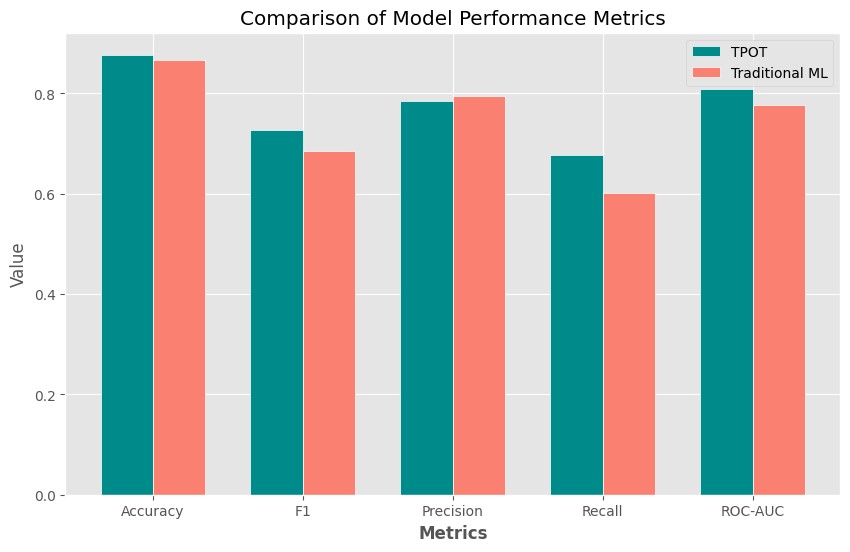

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

# Define the metrics and their values for TPOT and Traditional ML
metrics = ['Accuracy', 'F1', 'Precision', 'Recall', 'ROC-AUC']
tpot_values = [0.8771687394441885, 0.7267759562841531, 0.7840825350036846, 0.6772756206238065, 0.8089939414329068]
traditional_ml_values = [0.866421004145555, 0.6847826086956521, 0.7947855340622372, 0.6015276893698281, 0.7760774828880708]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]

# Set the style
style.use('ggplot')

# Create the figure and the axes
plt.figure(figsize=(10, 6))

# Plot the bars
plt.bar(r1, tpot_values, color='darkcyan', width=bar_width, edgecolor='white', label='TPOT')
plt.bar(r2, traditional_ml_values, color='salmon', width=bar_width, edgecolor='white', label='Traditional ML')

# Add the metric names as x-axis labels
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(metrics))], metrics)

# Add a legend
plt.legend()

# Add a title and y-axis label
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Value')

# Show the plot
plt.show()
